In [1]:
import numpy as np
from configparser import ConfigParser
from splinv import hmod
from splinv.grid import Cartesian
import matplotlib.pyplot as plt

In [2]:
log_m = 14.2; zh = 0.08
M_200=  10.**(log_m)
conc =  6.02*(M_200/1.E13)**(-0.12)*(1.47/(1.+zh))**(0.16)

# initialize halo
halo =   hmod.nfwTJ03(mass=M_200,conc=conc,redshift=zh,ra=0.,dec=0.)
# initialize pixel grids
configName  =   'test_unit.ini' #only works in arcmin.
parser      =   ConfigParser()
parser.read(configName)
Grid        =   Cartesian(parser)
yy,xx=np.meshgrid(Grid.ycgrid,Grid.xcgrid,indexing='ij')
haloSigma2  =   halo.Sigma(xx.flatten() * 3600, yy.flatten() * 3600).reshape((Grid.ny,Grid.nx))

In [14]:
print(xx)

[[-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]
 [-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]
 [-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]
 ...
 [-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]
 [-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]
 [-0.00355556 -0.00355    -0.00354444 ...  0.00353889  0.00354444
   0.00355   ]]


In [4]:
nfwCS02_grid = hmod.nfwCS02_grid(parser)
kappa_from_grid = nfwCS02_grid.add_halo(halo)[0]

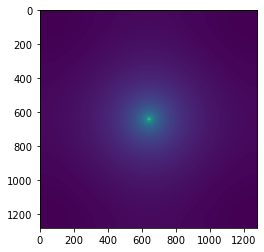

In [5]:
plt.imshow(kappa_from_grid[5])

In [6]:
print(np.sum(np.abs(kappa_from_grid[5])**2)**0.5)
kappaSigma2 = haloSigma2 * halo.lensKernel(Grid.zcgrid[5])
print(np.sum(np.abs( (kappaSigma2) ** 2)) **0.5)

32173.173550868007
323.1537028956213


In [12]:
print(np.max(kappa_from_grid[5]))

25.75013658430581


In [8]:
# # The (0,0) point is unstable
# haloSigma2[Grid.ny//2,Grid.nx//2]=0.
# # l2 normalization
# norm=   (np.sum(haloSigma2**2.))**0.5 #this is a large number, so normalizing is important. 
# haloSigma2=haloSigma2/norm
# rpix    =   halo.rs_arcsec/Grid.scale/3600.
# haloSigma1= np.fft.fftshift(hmod.haloCS02SigmaAtom(rpix,ny=Grid.ny,nx=Grid.nx,\
#         sigma_pix=-1,c=halo.c,fou=False))
# # The (0,0) point is unstable
# vmax    =   haloSigma1[Grid.ny//2,Grid.nx//2]
# haloSigma1[Grid.ny//2,Grid.nx//2]=0.
# # l2 normalization
# norm    =   (np.sum(haloSigma1**2.))**0.5 #this is almost exactly 1.
# haloSigma1= haloSigma1/norm
# print(np.max(np.abs(haloSigma1-haloSigma2)))

In [9]:
plt.imshow(haloSigma1)

NameError: name 'haloSigma1' is not defined